## Carga de librerías

In [1]:
from skimpy import skim
import pandas as pd
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler

## Carga y análisis de los datos

In [2]:
# Cargar el dataset
df = pd.read_csv('Mod1 diabetes.csv', sep=';')

# Eliminar la variable Insulin según el requerimiento del proyecto
df.drop('Insulin', axis=1, inplace=True)

# Eliminar la variable Num por considerarse innecesaria
df.drop('Num', axis=1, inplace=True)

El dataset contiene 392 filas y 6 columnas, sin valores faltantes o nulos. Las columnas incluyen: Num con valores que varían de 3 a 760, y una media de 390; Pregnancies que oscila entre 0 y 17, con una media de 3.3; Glucose, con valores entre 56 y 200, y una media de 120; BMI, que varía entre 18 y 67, con una media de 28; Age, con un rango de 21 a 81 y una media de 31; y Outcome, una variable binaria con una media de 0.33. Las distribuciones de las variables indican que Num y Age tienen amplios rangos, mientras que Pregnancies, Glucose, y BMI muestran una concentración de valores más baja. La variable Outcome tiene una mayor cantidad de ceros.

Las variables utilizadas son las siguientes:

* Pregnancies: Número de veces que una mujer ha estado embarazada.

* Glucose: Nivel de glucosa en sangre, medido en una prueba de tolerancia a la glucosa.

* BMI (Body Mass Index): Índice de masa corporal, calculado como el peso en kilogramos dividido por la altura en metros al cuadrado. El BMI es un indicador comúnmente usado para clasificar el sobrepeso y la obesidad.

* Age: Edad del paciente. La edad puede influir en el riesgo de desarrollar diabetes, con mayores riesgos generalmente en personas mayores.

* Outcome: Resultado del diagnóstico, donde típicamente un valor de 1 indica la presencia de diabetes y un valor de 0 indica la ausencia de la enfermedad.

In [3]:
# Resumen breve del dataset, se verifica que no existen valores nulos
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 392    │ │ int32       │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Pregnancies       │    0 │       0 │     3.3 │     3.2 │    0 │     1 │     2 │     5 │      17 │   ▇▃▂▁   │  │
│ │ Glucose           │    0 │       0 │     120 │      31 │   56 │    99 │   120 │   140 │     200 │  ▁▇▇▅▃▂  │  │
│ │ BMI               │    0 │       0 │      33 │       7 │   18 │    28 │    33 │    37 │      67 │   ▃▇▆▁   │  │
│ │ Age               │    0 │       0 │      31 │      10 │   21 │    23 │    27 │    36 │      81 │   ▇▂▁▁   │  │
│ │ Outcome           │    0 │       0 │    0.33 │    0.47 │    0 │     0 │     0 │     1 │       1 │  ▇    ▃  │  │
│ └───────────────────┴──────┴─────────┴─────────┴─────────┴──────┴───────┴───────┴───────┴─────────┴──────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

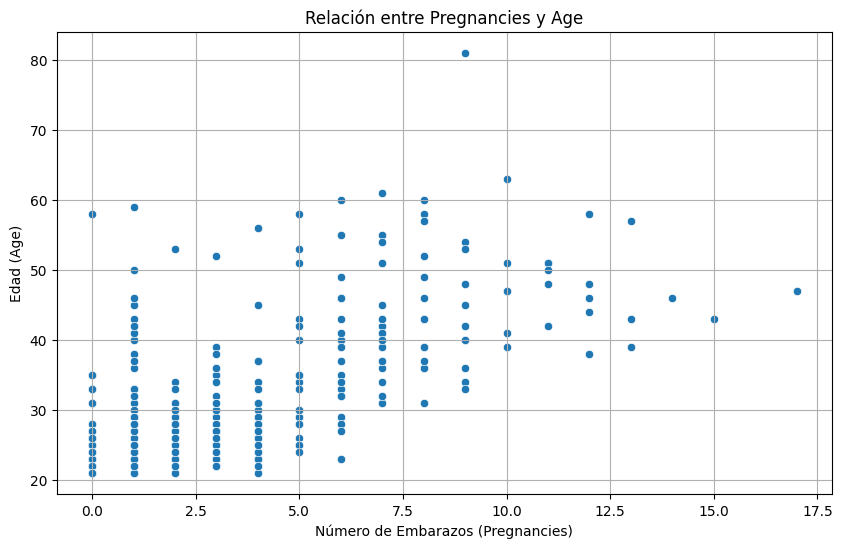

Pregnancies    22
Glucose        22
BMI            22
Age            22
Outcome        22
dtype: int64
5.612244897959184


In [4]:
# Graficar la relación entre Pregnancies y Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Pregnancies', y='Age')
plt.title('Relación entre Pregnancies y Age')
plt.xlabel('Número de Embarazos (Pregnancies)')
plt.ylabel('Edad (Age)')
plt.grid(True)
plt.show()

# Contar los registros con embarazos iguales o superiores a 10
print(df[df["Pregnancies"] >= 10].count())
print(22*100/392)

# Eliminar registros donde Pregnancies es igual o mayor a 10
df = df[df['Pregnancies'] < 10]

In [5]:
# Resumen breve del dataset, se verifica que no existen valores nulos
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 370    │ │ int32       │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Pregnancies       │    0 │       0 │     2.8 │     2.5 │    0 │     1 │     2 │     4 │       9 │  ▇▃▃▁▂▁  │  │
│ │ Glucose           │    0 │       0 │     120 │      31 │   56 │    99 │   120 │   140 │     200 │  ▁▇▇▅▃▂  │  │
│ │ BMI               │    0 │       0 │      33 │     7.1 │   18 │    28 │    33 │    37 │      67 │   ▃▇▆▁   │  │
│ │ Age               │    0 │       0 │      30 │     9.5 │   21 │    23 │    26 │    34 │      81 │   ▇▂▁▁   │  │
│ │ Outcome           │    0 │       0 │    0.31 │    0.46 │    0 │     0 │     0 │     1 │       1 │  ▇    ▃  │  │
│ └───────────────────┴──────┴─────────┴─────────┴─────────┴──────┴───────┴───────┴───────┴─────────┴──────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Gráficas relevantes

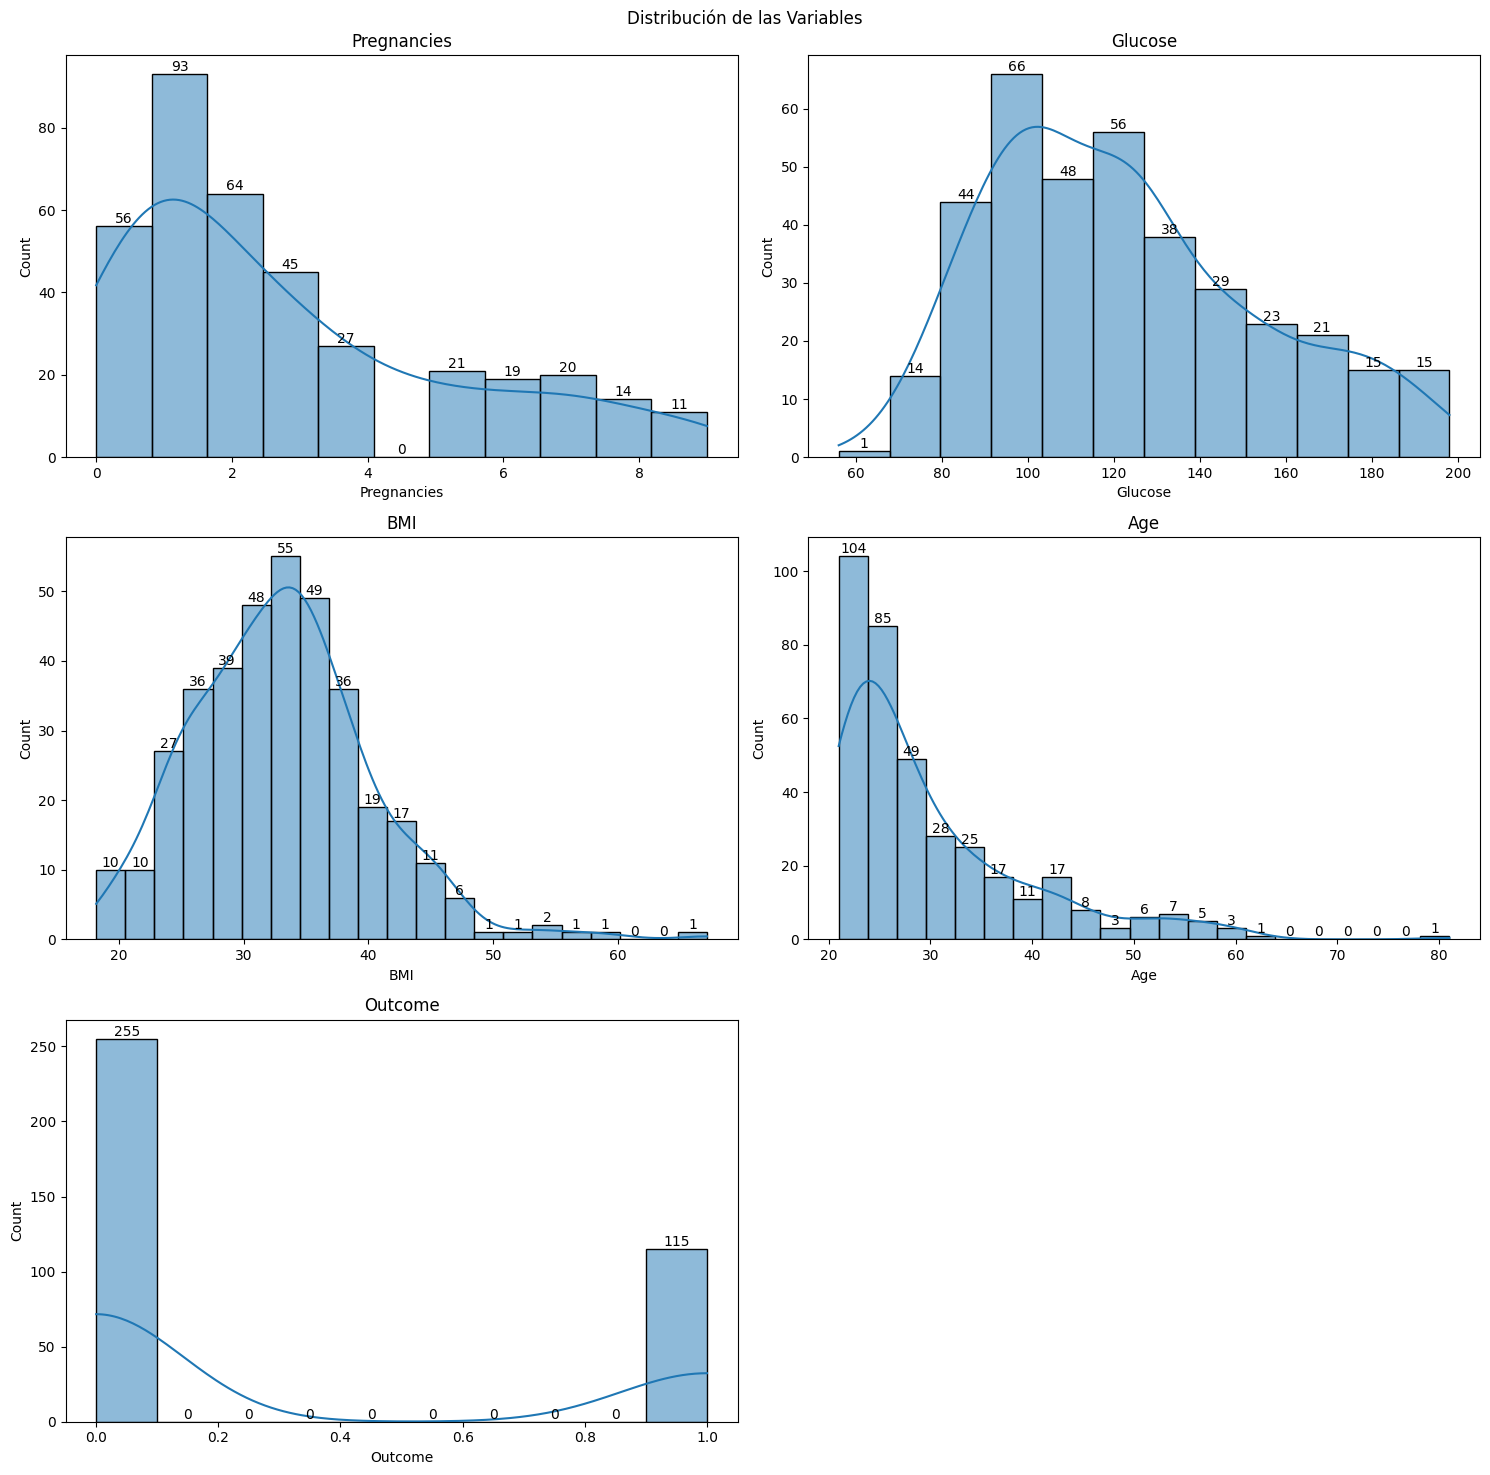

In [6]:
# Visualización de la distribución de las variables
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Distribución de las Variables')

for i, col in enumerate(df.columns[:5]):  # Mostrar solo las primeras 5 variables
    ax = sns.histplot(df[col], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(col)
    
    # Agregar los valores encima de las barras
    for patch in ax.patches:
        height = patch.get_height()
        ax.text(patch.get_x() + patch.get_width() / 2, height + 0.01, f'{int(height)}', 
                ha='center', va='bottom', fontsize=10)

# Eliminar la última subgráfica vacía
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

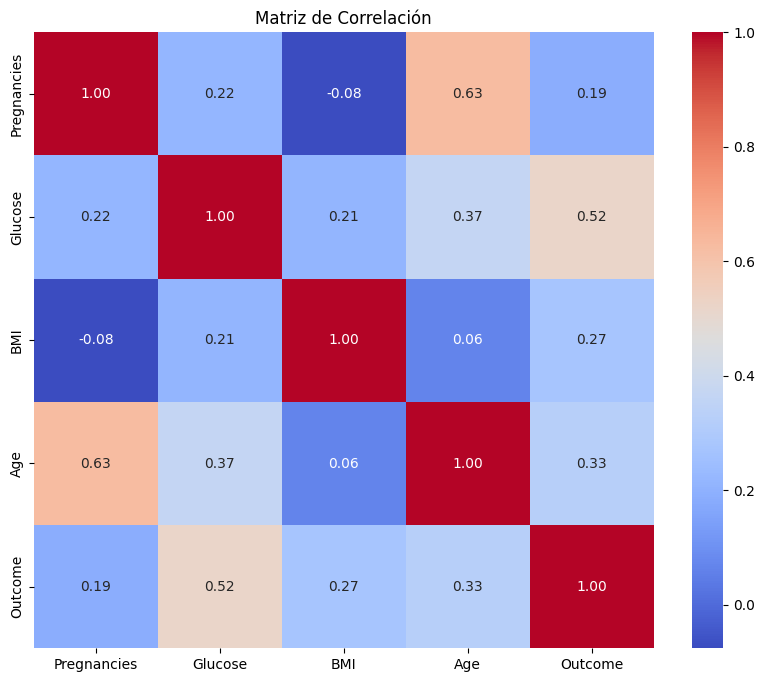

In [7]:
# Gráfica de correlación entre las variables
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

## Escalado y balanceo de datos mediante Undersampling

In [8]:
# Separar las características y la variable objetivo
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancear los datos de entrenamiento mediante undersampling
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_scaled, y_train)

## Gráfica del codo para determinar K-vecinos

c:\Users\Jaris Aizprua\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Jaris Aizprua\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Jaris Aizprua\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Jaris Aizprua\AppData\Local\Programs\Python\Python31

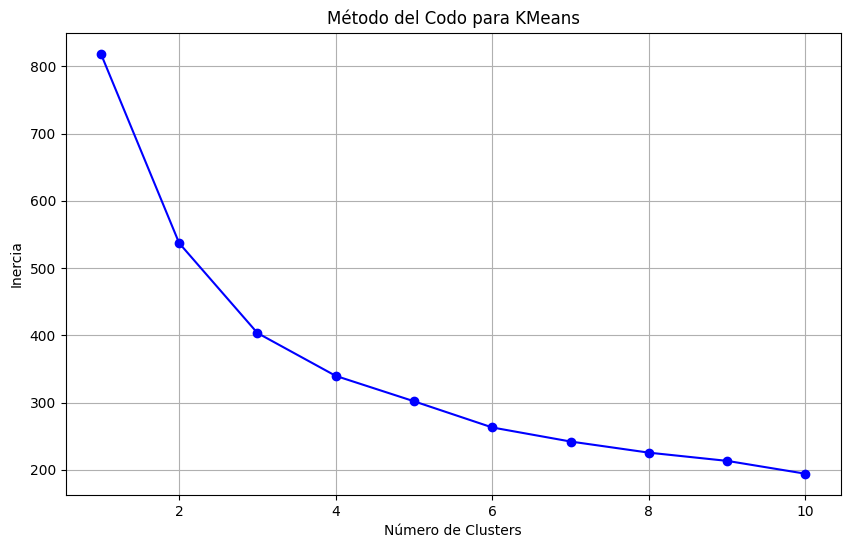

In [9]:
# Método del codo para KMeans
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_res)
    inertia.append(kmeans.inertia_)

# Gráfica del método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para KMeans')
plt.grid(True)
plt.show()

## Aplicación de algoritmos de clustering (KMeans & Aglomerativo)

In [10]:
# Aplicación de KMeans y Agglomerative Clustering con n=3
n_clusters = 3

# KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_res)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=n_clusters)
agglo_labels = agglo.fit_predict(X_train_res)

# Cálculo de la métrica de silhouette para ambos métodos
silhouette_kmeans = silhouette_score(X_train_res, kmeans_labels)
silhouette_agglo = silhouette_score(X_train_res, agglo_labels)

print(f'Métrica de Silhouette para KMeans: {silhouette_kmeans}')
print(f'Métrica de Silhouette para Agglomerative Clustering: {silhouette_agglo}')

Métrica de Silhouette para KMeans: 0.3233602129849913
Métrica de Silhouette para Agglomerative Clustering: 0.2662053315353969


c:\Users\Jaris Aizprua\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


* Diferencias en la separación de clusters: KMeans muestra una mejor separación entre los clusters, lo que puede indicar que es más efectivo para este conjunto de datos en particular.
* Superposición de clusters en Agglomerative Clustering: La mayor superposición de los clusters en el método aglomerativo puede sugerir que este modelo es menos adecuado para estos datos, o que los parámetros de clustering podrían ajustarse mejor.
* Importancia de la selección del método: Estos resultados destacan la importancia de probar múltiples métodos de clustering y realizar evaluaciones cuidadosas, como el análisis de la métrica de silhouette, para seleccionar el método más adecuado.

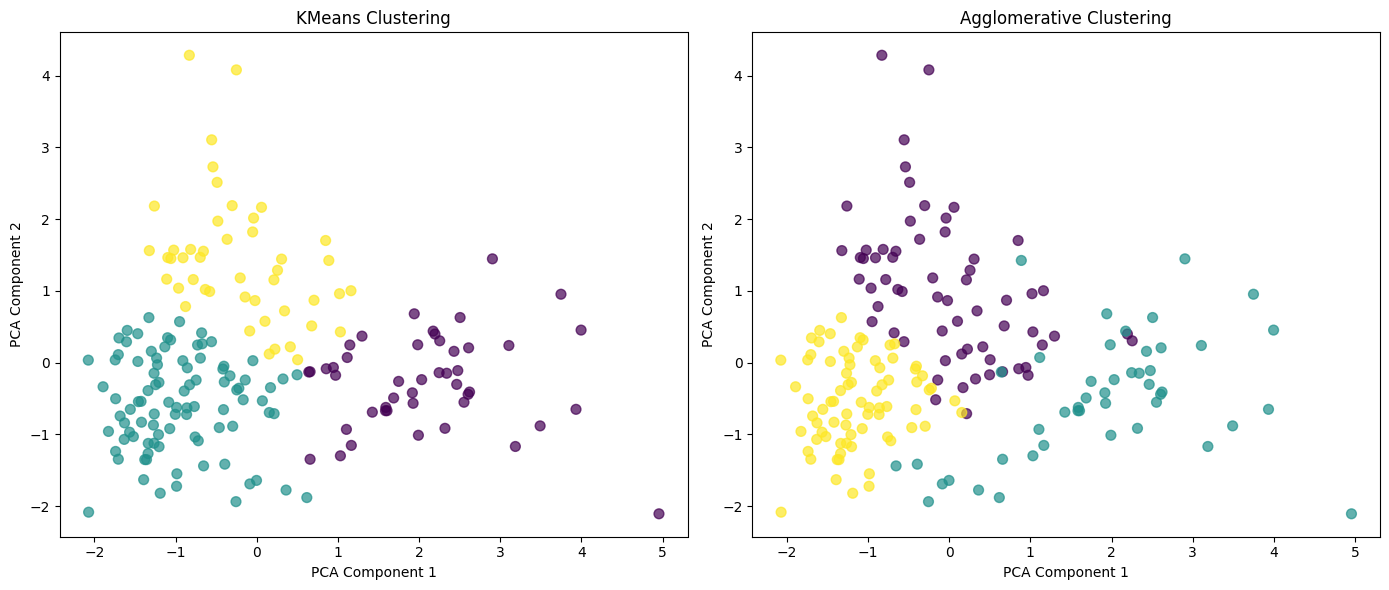

In [11]:
# PCA solamente para visualización de los clústeres

# Reducción de dimensionalidad usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_res)

# Creación de una figura con subplots para ambos métodos de clustering
plt.figure(figsize=(14, 6))

# Subplot para KMeans
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Subplot para Agglomerative Clustering
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.show()

## Aplicación de algoritmos de clasificación (Árbol de decisión & SVM)

In [12]:
# Árbol de Decisión
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_res, y_train_res)
y_pred_tree = tree_clf.predict(X_test_scaled)

# Máquina de Vectores de Soporte (SVM)
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_res, y_train_res)
y_pred_svm = svm_clf.predict(X_test_scaled)

# Reporte de clasificación para ambos modelos
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

Ambos modelos tienen un rendimiento similar, el SVM muestra una ligera ventaja en la predicción de la Clase 1, mientras que el Árbol de Decisión es un poco mejor en evitar falsos positivos.

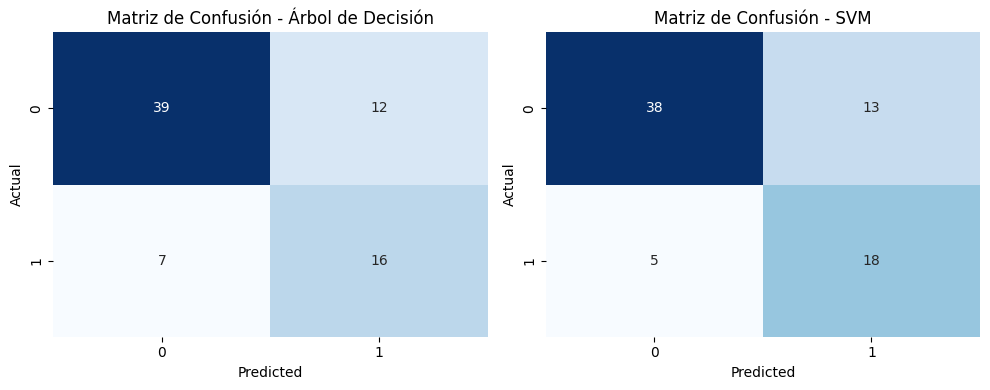

In [13]:
# Matrices de Confusión
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Gráfica de la matriz de confusión para el Árbol de Decisión
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Gráfica de la matriz de confusión para el SVM
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [14]:
# Almacenar todas las métricas de cada modelo en un dataframe de Pandas
metrics_classification = pd.DataFrame({
    'Model': ['Árbol de decisión', 'SVM'],
    'Accuracy': [report_tree['accuracy'], report_svm['accuracy']],
    'Precision': [report_tree['weighted avg']['precision'], report_svm['weighted avg']['precision']],
    'Recall': [report_tree['weighted avg']['recall'], report_svm['weighted avg']['recall']],
    'F1-Score': [report_tree['weighted avg']['f1-score'], report_svm['weighted avg']['f1-score']]
})

metrics_clustering = pd.DataFrame({
    'Model': ['KMeans', 'Agglomerative'],
    'Silhouette Score': [silhouette_kmeans, silhouette_agglo]
})

print(metrics_classification, '\n')
print(metrics_clustering)

               Model  Accuracy  Precision    Recall  F1-Score
0  Árbol de decisión  0.743243   0.761919  0.743243  0.749212
1                SVM  0.756757   0.789522  0.756757  0.764424 

           Model  Silhouette Score
0         KMeans          0.323360
1  Agglomerative          0.266205


## Resumen de métricas

* Comparación de Modelos de Clasificación: SVM ofrece un rendimiento ligeramente superior al Árbol de Decisión en términos de precisión, precision, recall y F1-Score. Esto sugiere que SVM es más efectivo para este conjunto de datos en particular.
* Evaluación de Clustering: KMeans tiene una puntuación de Silhouette superior a Agglomerative Clustering, lo que indica una mejor definición de clusters y menos solapamiento. Esto sugiere que KMeans es más adecuado para este conjunto de datos en comparación con Agglomerative Clustering.

## Búsqueda de hiperparámetros con RandomizedSearchCV y evaluación mediante Cross-Validation

In [15]:
# Parámetros para Árbol de Decisión
param_dist_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20]
}

# Randomized Search para Árbol de Decisión
random_search_tree = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_dist_tree, 
                                        n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search_tree.fit(X_train_res, y_train_res)
best_tree = random_search_tree.best_estimator_

# Parámetros para SVM
param_dist_svm = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Randomized Search para SVM
random_search_svm = RandomizedSearchCV(SVC(random_state=42), param_distributions=param_dist_svm, 
                                       n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search_svm.fit(X_train_res, y_train_res)
best_svm = random_search_svm.best_estimator_

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para Árbol de Decisión:", random_search_tree.best_params_)
print("Mejores hiperparámetros para SVM:", random_search_svm.best_params_)

# Evaluación de los modelos optimizados
y_pred_tree = best_tree.predict(X_test_scaled)
y_pred_svm = best_svm.predict(X_test_scaled)

# Reporte de clasificación para ambos modelos
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

Mejores hiperparámetros para Árbol de Decisión: {'min_samples_split': 5, 'max_depth': 10, 'criterion': 'entropy'}
Mejores hiperparámetros para SVM: {'kernel': 'rbf', 'gamma': 'auto', 'C': 0.1}


Mejores hiperparámetros encontrados:

Árbol de Decisión:
* min_samples_split: 5

Este parámetro define el número mínimo de muestras requeridas para dividir un nodo interno. Un valor más alto puede ayudar a prevenir el sobreajuste al asegurarse de que cada división sea significativa y basada en una cantidad suficiente de datos. Con min_samples_split establecido en 5, el árbol requiere al menos 5 muestras en un nodo para intentar dividirlo.

* max_depth: 10

Este parámetro limita la profundidad máxima del árbol. Restringir la profundidad del árbol es una forma efectiva de controlar el sobreajuste, ya que impide que el modelo se vuelva demasiado complejo y se ajuste demasiado a las peculiaridades del conjunto de datos de entrenamiento. Un max_depth de 10 indica que el árbol no se extenderá más allá de 10 niveles de profundidad, equilibrando la complejidad del modelo y su capacidad de generalización.

* criterion: 'entropy'

Este criterio se utiliza para medir la calidad de una división. La entropy mide la impureza de la información (o la cantidad de desorden) en un nodo. El Árbol de Decisión con el criterio de entropy selecciona divisiones que minimizan la impureza de los subconjuntos resultantes, tratando de crear nodos que sean lo más puros posible. Esto puede ser especialmente útil en problemas donde las clases están desbalanceadas o hay características muy informativas.

SVM:

* kernel: 'rbf'

El kernel define el tipo de transformación que se aplica a los datos antes de buscar el hiperplano óptimo que separa las clases. El rbf (Radial Basis Function) kernel es un kernel no lineal que puede manejar relaciones complejas entre las características. Es una opción común y poderosa cuando se espera que las relaciones entre las características no sean lineales.

* gamma: 'auto'

gamma es un parámetro del kernel rbf que define la influencia de un solo ejemplo de entrenamiento. Valores más bajos significan un "campo de influencia" más amplio, mientras que valores más altos indican que solo los ejemplos cercanos tienen un alto impacto en la función de decisión. Con gamma establecido en 'auto', se configura como 1/n_features, lo que proporciona un valor estándar que evita el sobreajuste.

* C: 0.1

C es un parámetro de regularización que controla la compensación entre maximizar el margen del hiperplano y minimizar el error de clasificación. Un valor bajo de C hace que el modelo intente encontrar un hiperplano con un margen más amplio, incluso si eso significa más errores de clasificación. Esto ayuda a evitar el sobreajuste al permitir un mayor margen de tolerancia para los errores de clasificación.

In [16]:
# Almacenar todas las métricas de cada modelo en un dataframe de Pandas
metrics_classification = pd.DataFrame({
    'Model': ['Árbol de decisión', 'SVM'],
    'Accuracy': [report_tree['accuracy'], report_svm['accuracy']],
    'Precision': [report_tree['weighted avg']['precision'], report_svm['weighted avg']['precision']],
    'Recall': [report_tree['weighted avg']['recall'], report_svm['weighted avg']['recall']],
    'F1-Score': [report_tree['weighted avg']['f1-score'], report_svm['weighted avg']['f1-score']]
})

metrics_clustering = pd.DataFrame({
    'Model': ['KMeans', 'Agglomerative'],
    'Silhouette Score': [silhouette_kmeans, silhouette_agglo]
})

print(metrics_classification, '\n')
print(metrics_clustering)

               Model  Accuracy  Precision    Recall  F1-Score
0  Árbol de decisión  0.756757   0.779497  0.756757  0.763189
1                SVM  0.743243   0.793959  0.743243  0.752500 

           Model  Silhouette Score
0         KMeans          0.323360
1  Agglomerative          0.266205


## Resumen de métricas posterior a la optimización de hiperparámetros

* El Árbol de Decisión ha mostrado un buen equilibrio en sus métricas de rendimiento, con una precisión y recall razonablemente altos. La precisión (precision) ligeramente superior indica que el modelo es mejor para identificar correctamente las verdaderas positivas, mientras que el F1-Score, que combina precision y recall, también es robusto.

* El SVM, aunque tiene una precisión general ligeramente inferior a la del Árbol de Decisión, muestra una mejor precisión (precision), lo que sugiere que es menos probable que tenga falsos positivos. Sin embargo, su F1-Score es un poco más bajo que el del Árbol de Decisión, lo que podría indicar una ligera desventaja en la armonización de precisión y recall.

* Dependiendo de los costos de los errores (falsos positivos vs. falsos negativos) y otros factores específicos del problema, uno de los modelos puede ser más adecuado.

* Puede ser útil realizar más experimentos con otros modelos de clasificación o ajustar aún más los hiperparámetros para mejorar el rendimiento.